In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading the dataset of Mumbai SantaCruz from 1990 - 2022

In [2]:
mumbai = pd.read_csv('Mumbai_1990_2022_Santacruz.csv')

## Data Exploration

In [3]:
mumbai.head()

,time,tavg,tmin,tmax,prcp
0,01-01-1990,23.2,17.0,NaN,0.0
1,02-01-1990,22.2,16.5,29.9,0.0
2,03-01-1990,21.8,16.3,30.7,0.0
3,04-01-1990,25.4,17.9,31.8,0.0
4,05-01-1990,26.5,19.3,33.7,0.0


In [4]:
mumbai.describe()

,tavg,tmin,tmax,prcp
count,11883.000000,9440.000000,9987.000000,7213.000000
mean,27.762509,22.618549,32.315040,10.942007
std,2.189138,3.803629,2.234577,29.808576
min,17.700000,8.500000,22.300000,0.000000
25%,26.600000,19.800000,30.900000,0.000000
50%,28.100000,23.700000,32.400000,0.000000
75%,29.300000,25.400000,33.900000,7.100000
max,33.700000,30.400000,41.300000,461.000000


In [5]:
mumbai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11883 non-null  float64
 2   tmin    9440 non-null   float64
 3   tmax    9987 non-null   float64
 4   prcp    7213 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


## Data Visualization

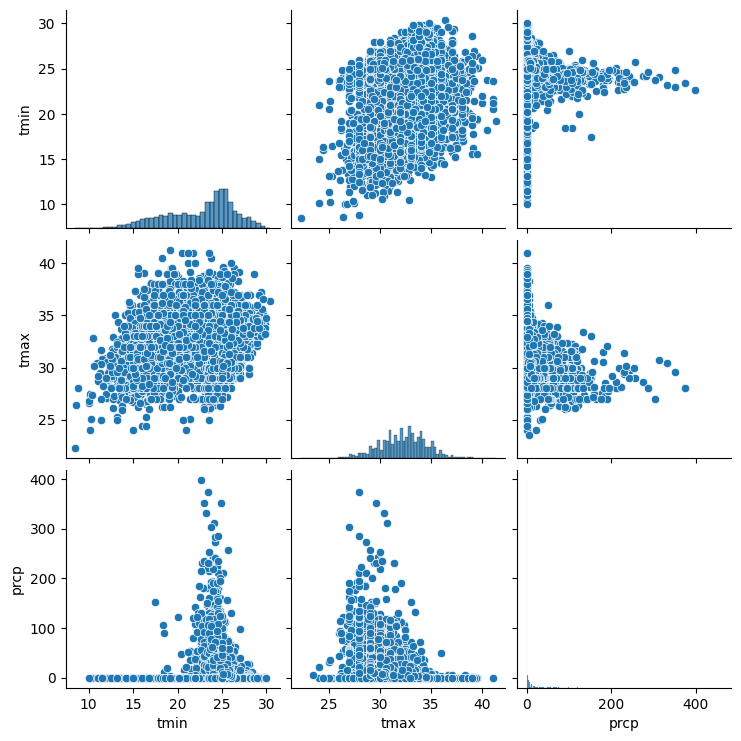

In [6]:
# Pairplot for tmin,tmax,prcp
sns.pairplot(mumbai[['tmin','tmax','prcp']])
plt.show()

In [7]:
mumbai.isnull().sum()

time       0
tavg      11
tmin    2454
tmax    1907
prcp    4681
dtype: int64

In [8]:
np.where(pd.isnull(mumbai['prcp']))

(array([  140,   145,   146, ..., 11323, 11833, 11834], dtype=int64),)

In [9]:
mumbai.iloc[140]

time    21-05-1990
tavg          29.9
tmin          27.3
tmax          34.5
prcp           NaN
Name: 140, dtype: object

In [10]:
# Handling null values
new = mumbai.fillna(method='bfill')

In [11]:
new.isnull().sum()

time    0
tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64

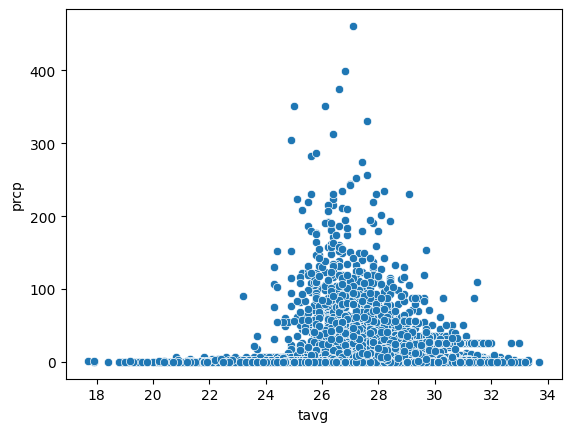

In [12]:
sns.scatterplot(x='tavg',y='prcp',data=new)
plt.show()

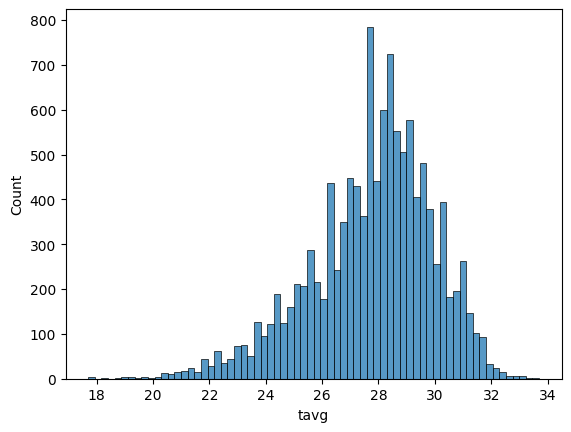

In [13]:
sns.histplot(new['tavg'])
plt.show()

In [14]:
# finding the yearwise temperature
new[['Day','Month','Year']] = new['time'].str.split('-',2,expand=True)

C:\Users\mahes\AppData\Local\Temp\ipykernel_9600\3772074373.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  new[['Day','Month','Year']] = new['time'].str.split('-',2,expand=True)


In [15]:
new.head(10)

,time,tavg,tmin,tmax,prcp,Day,Month,Year
0,01-01-1990,23.2,17.0,29.9,0.0,01,01,1990
1,02-01-1990,22.2,16.5,29.9,0.0,02,01,1990
2,03-01-1990,21.8,16.3,30.7,0.0,03,01,1990
3,04-01-1990,25.4,17.9,31.8,0.0,04,01,1990
4,05-01-1990,26.5,19.3,33.7,0.0,05,01,1990
5,06-01-1990,25.1,19.8,33.5,0.0,06,01,1990
6,07-01-1990,26.0,18.9,33.7,0.0,07,01,1990
7,08-01-1990,26.6,18.8,34.6,0.0,08,01,1990
8,09-01-1990,25.1,19.0,34.4,0.0,09,01,1990
9,10-01-1990,26.8,19.3,34.7,0.0,10,01,1990


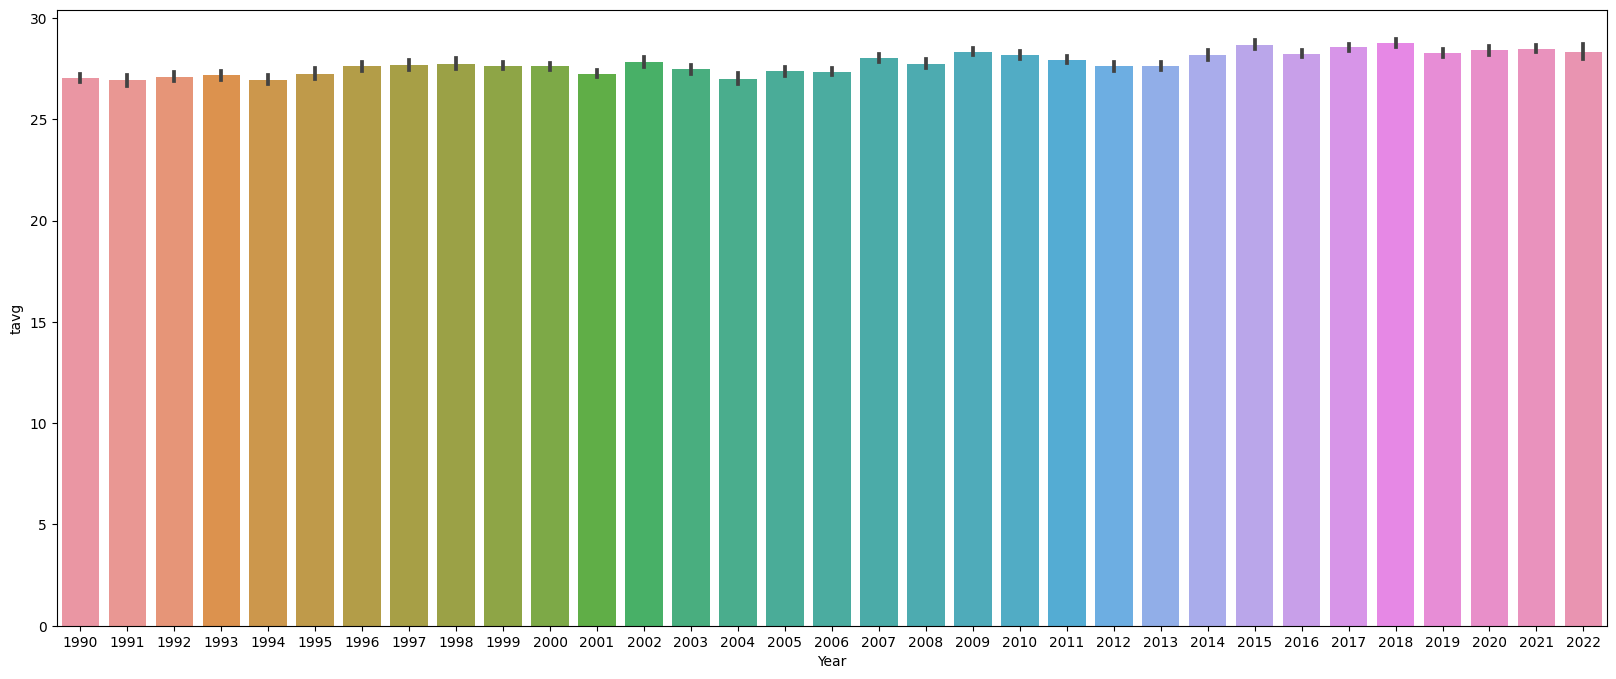

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(x=new['Year'],y=new['tavg'])
plt.show()

## Data Analysis

In [17]:
monthly_avg_max_temp = new.groupby('Month')['tmax'].mean()

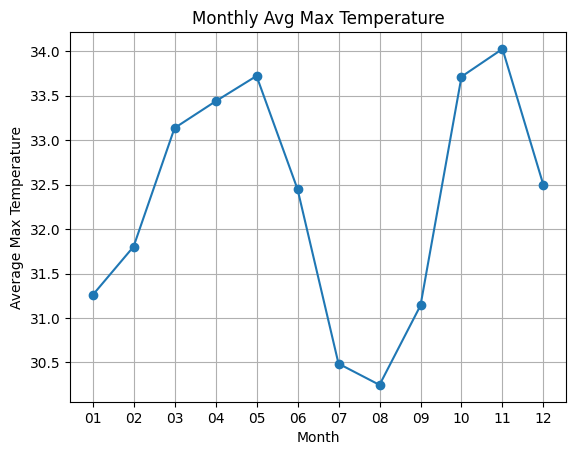

In [18]:
plt.plot(monthly_avg_max_temp.index,monthly_avg_max_temp.values,marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Avg Max Temperature')
plt.grid(True)
plt.show()

## Advanced Data Analysis, predicting Rainfall

In [19]:
X = new[['tmax','tmin']]
y = new['prcp']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error for Rainfall Prediction: {mse}")

Mean Squared Error for Rainfall Prediction: 490.7557908063673


In [23]:
rainfall = new.groupby('Month')['prcp'].mean()

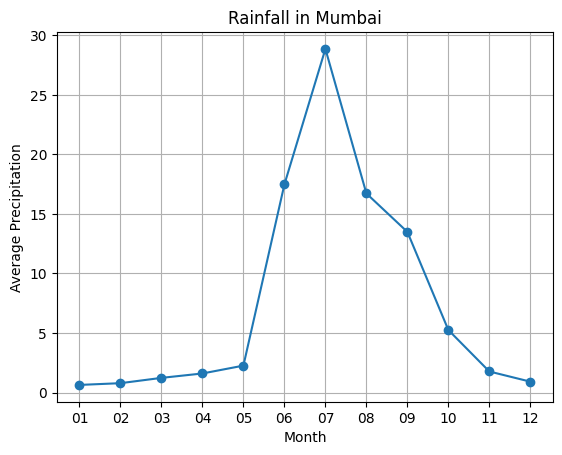

In [24]:
plt.plot(rainfall.index,rainfall.values,marker='o')
plt.xlabel('Month')
plt.ylabel('Average Precipitation')
plt.title('Rainfall in Mumbai')
plt.grid(True)
plt.show()

In [25]:
highest_rainfall = rainfall.idxmax()
lowest_rainfall = rainfall.idxmin()
print(f'Maximum Precipitation in month {highest_rainfall} and Minimum Precipation in month {lowest_rainfall}')

Maximum Precipitation in month 07 and Minimum Precipation in month 01
